In [115]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, explained_variance_score, max_error


In [116]:
df = pd.read_csv('Test/mldata.csv')

In [117]:
print(len(df))
df = df[~df['spy_oc_ret'].isna()]
print(len(df))

728
703


In [118]:
df['date'] = pd.to_datetime(df['date'],format='%d/%m/%Y')


In [119]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [120]:
df

,date,spy_pco_ret,spy_oc_ret,vix_pco_ret,vix_oc_ret,tnx_pco_ret,tnx_oc_ret,dxy_pco_ret,dxy_oc_ret,cl_pco_ret,...,xlk_oc_ret,xlu_pco_ret,xlu_oc_ret,xlv_pco_ret,xlv_oc_ret,xly_pco_ret,xly_oc_ret,day,month,year
1,2020-01-02,0.005220,0.004111,-0.023222,-0.073551,-0.008338,-0.011035,0.000934,0.003835,0.008844,...,0.009622,0.001702,-0.014213,0.003043,-0.000392,0.006299,0.005546,2,1,2020
2,2020-01-03,-0.011420,0.003892,0.203689,-0.065956,-0.028693,-0.021882,-0.000619,0.000517,0.000000,...,0.003368,0.000784,0.001253,-0.011554,0.002873,-0.012686,0.004230,3,1,2020
3,2020-01-06,-0.005955,0.009829,0.101997,-0.103560,-0.001678,0.014566,0.000620,-0.002374,0.000471,...,0.012470,-0.001251,0.002192,-0.004544,0.010816,-0.007311,0.010167,6,1,2020
4,2020-01-07,-0.001916,-0.000898,-0.000722,-0.003613,-0.007730,0.016694,-0.000207,0.003414,-0.005690,...,-0.002157,-0.002500,0.001096,-0.002749,0.000787,-0.000634,-0.000952,7,1,2020
5,2020-01-08,0.000651,0.004676,0.099347,-0.112797,-0.002189,0.027976,-0.001547,0.004854,0.002233,...,0.009609,0.000469,-0.000938,0.000492,0.005997,-0.000873,0.003893,8,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,2022-10-10,0.003225,-0.010825,0.050064,-0.014576,0.001288,0.000000,0.002954,0.000027,0.009067,...,-0.016809,0.002039,-0.000313,0.002365,-0.008624,0.001493,-0.007667,10,10,2022
724,2022-10-11,-0.004944,-0.001396,0.034206,0.002086,0.003086,0.010000,0.001972,0.001200,0.000110,...,-0.009656,-0.003758,0.000157,-0.002052,0.007401,-0.004936,-0.003235,11,10,2022
725,2022-10-12,0.001202,-0.004495,-0.002676,0.000894,0.003554,-0.012902,-0.001816,0.000115,-0.007611,...,-0.003846,-0.001571,-0.031791,0.003184,-0.008056,0.000072,0.002524,12,10,2022
726,2022-10-13,-0.020628,0.048009,0.000894,-0.049405,-0.010764,0.023834,-0.006843,0.000640,-0.002177,...,0.059695,-0.015117,0.040766,-0.014356,0.038202,-0.029928,0.042124,13,10,2022


In [121]:
X = df[['spy_pco_ret','vix_pco_ret','tnx_pco_ret','dxy_pco_ret','cl_pco_ret','gc_pco_ret','tlt_pco_ret','xlf_pco_ret', 'xle_pco_ret', 'xlc_pco_ret', 'xlk_pco_ret', 'xlu_pco_ret','xlv_pco_ret', 'xly_pco_ret']]
y = df['spy_oc_ret']

#,'day','month','year'

X = X * 100
y = y * 100

X['day'] = df[['day']]
X['month'] = df[['month']]
X['year'] = df[['year']]



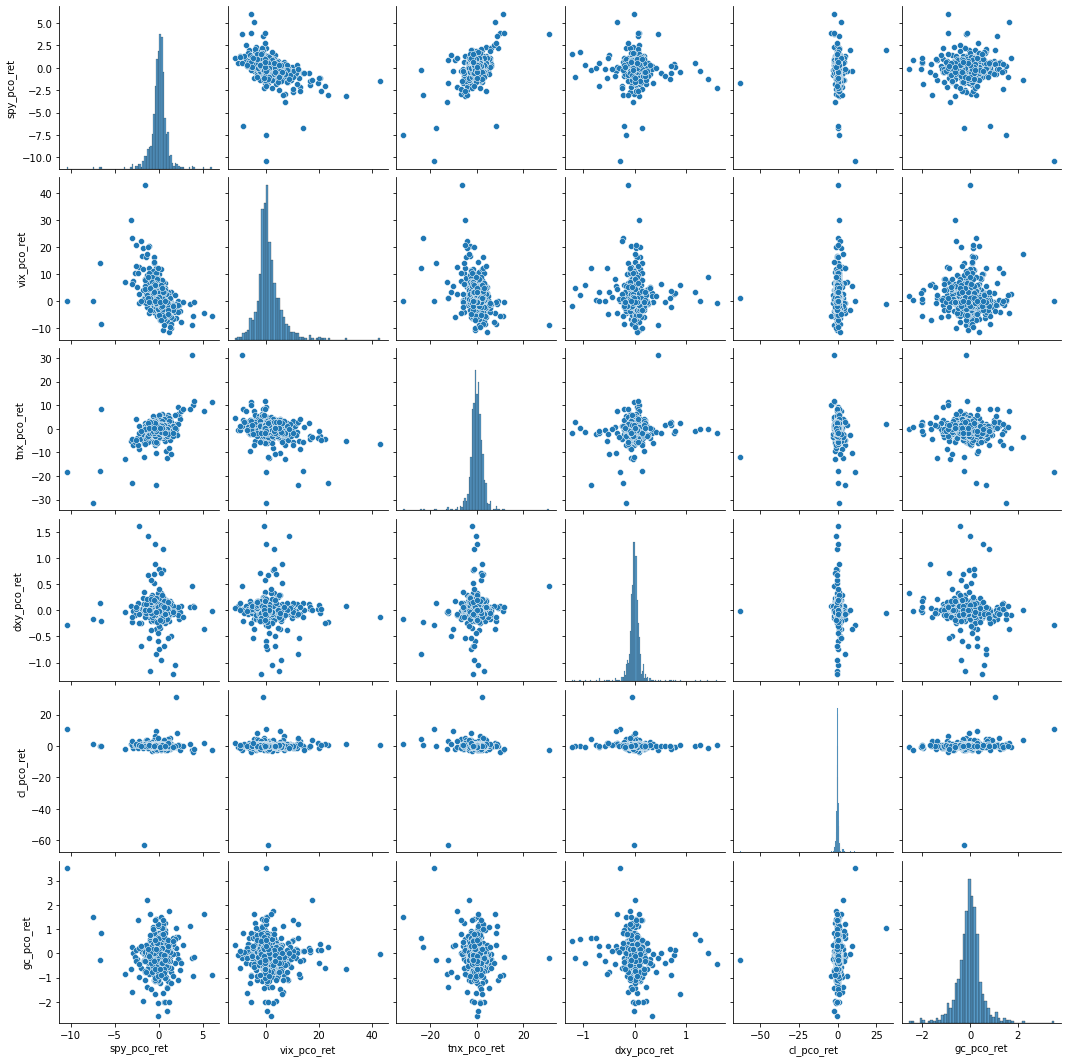

In [124]:
import seaborn as sns

sns.pairplot(X[['spy_pco_ret','vix_pco_ret','tnx_pco_ret','dxy_pco_ret','cl_pco_ret','gc_pco_ret']])
plt.show()

In [101]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
xgbr = xgb.XGBRegressor(objective='reg:squarederror')
xgbr.fit(xtrain, ytrain)
 
ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("RMSE: %.2f" % (mse**(1/2.0)))

print('XGBoost model r2 score: {0:0.4f}'. format(r2_score(ytest, ypred)))
print('XGBoost model mean_absolute_error score: {0:0.4f}'. format(mean_absolute_error(ytest, ypred)))
print('XGBoost model mean_squared_error score: {0:0.4f}'. format(mean_squared_error(ytest, ypred)))
print('XGBoost model explained_variance_score score: {0:0.4f}'. format(explained_variance_score(ytest, ypred)))



RMSE: 1.06
XGBoost model r2 score: -0.3013
XGBoost model mean_absolute_error score: 0.9226
XGBoost model mean_squared_error score: 1.7247
XGBoost model explained_variance_score score: -0.2980


C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [65]:


mse = mean_squared_error(ytest, ypred)
print("RMSE: %.2f" % (mse**(1/2.0)))


RMSE: 1.20


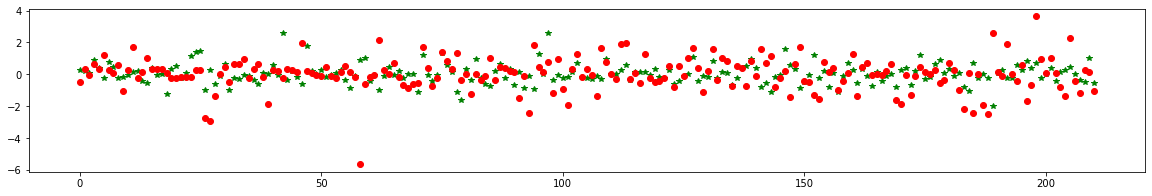

In [66]:
import matplotlib.pyplot as plt
plt.plot(ypred,'g*', ytest.values.tolist(), 'ro')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [83]:
#ytest.values.tolist()
#ypred

tmp = pd.DataFrame()
tmp['ytest'] = ytest.values.tolist()
tmp['ypred'] = ypred
print(len(tmp.query("ytest > 0 and ypred > 0")))
print(len(tmp.query("ytest < 0 and ypred < 0")))

print(len(tmp.query("ytest < 0 and ypred > 0")))
print(len(tmp.query("ytest > 0 and ypred < 0")))

59
55
40
55


In [78]:


params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgbr = xgb.XGBRegressor(seed = 20)
clf_grid = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)
clf_grid.fit(xtrain, ytrain)
print("Best parameters:", clf_grid.best_params_)
print("Lowest RMSE: ", (-clf_grid.best_score_)**(1/2.0))

Fitting 5 folds for each of 54 candidates, totalling 270 fits


C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Us

C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Us

C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Us

C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Us

C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Us

C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Us

C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Us

C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Us

C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Us

Best parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Lowest RMSE:  0.8804436390241671


C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [40]:
'''
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
xgbr = xgb.XGBRegressor(seed = 20)
clf_random = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)
clf_random.fit(xtrain, ytrain)
print("Best parameters:", clf_random.best_params_)
print("Lowest RMSE: ", (-clf_random.best_score_)**(1/2.0))
'''

'\nparams = { \'max_depth\': [3, 5, 6, 10, 15, 20],\n           \'learning_rate\': [0.01, 0.1, 0.2, 0.3],\n           \'subsample\': np.arange(0.5, 1.0, 0.1),\n           \'colsample_bytree\': np.arange(0.4, 1.0, 0.1),\n           \'colsample_bylevel\': np.arange(0.4, 1.0, 0.1),\n           \'n_estimators\': [100, 500, 1000]}\nxgbr = xgb.XGBRegressor(seed = 20)\nclf_random = RandomizedSearchCV(estimator=xgbr,\n                         param_distributions=params,\n                         scoring=\'neg_mean_squared_error\',\n                         n_iter=25,\n                         verbose=1)\nclf_random.fit(xtrain, ytrain)\nprint("Best parameters:", clf_random.best_params_)\nprint("Lowest RMSE: ", (-clf_random.best_score_)**(1/2.0))\n'

In [80]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
# fit model no training data
#model = xgb.XGBRegressor(clf_grid.best_params_)
#model.fit(xtrain, ytrain)

# make predictions for test data
y_pred = clf_grid.predict(xtest)
#predictions = [round(value) for value in y_pred]
# evaluate predictions
#accuracy = accuracy_score(ytest, y_pred)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [81]:
mse = mean_squared_error(ytest, y_pred)
print("RMSE: %.2f" % (mse**(1/2.0)))

RMSE: 1.06


In [79]:
#for i in range(0,len(ytest))


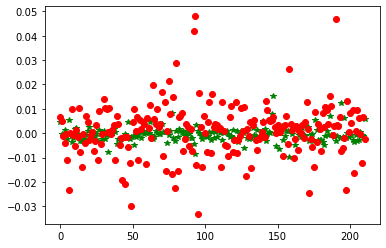

In [45]:
import matplotlib.pyplot as plt
plt.plot(y_pred,'g*', ytest.values.tolist(), 'ro')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

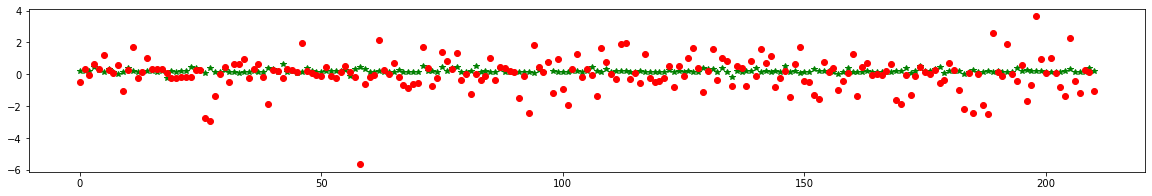

In [82]:
import matplotlib.pyplot as plt
plt.plot(y_pred,'g*', ytest.values.tolist(), 'ro')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [84]:
tmp = pd.DataFrame()
tmp['ytest'] = ytest.values.tolist()
tmp['ypred'] = y_pred
print(len(tmp.query("ytest > 0 and ypred > 0")))
print(len(tmp.query("ytest < 0 and ypred < 0")))

print(len(tmp.query("ytest < 0 and ypred > 0")))
print(len(tmp.query("ytest > 0 and ypred < 0")))

112
1
94
2


tmp

In [103]:

print('XGBoost model r2 score: {0:0.4f}'. format(r2_score(ytest, y_pred)))
print('XGBoost model mean_absolute_error score: {0:0.4f}'. format(mean_absolute_error(ytest, y_pred)))
print('XGBoost model mean_squared_error score: {0:0.4f}'. format(mean_squared_error(ytest, y_pred)))
print('XGBoost model explained_variance_score score: {0:0.4f}'. format(explained_variance_score(ytest, y_pred)))
print('XGBoost model max_error score: {0:0.4f}'. format(max_error(ytest, y_pred)))



XGBoost model r2 score: -0.0152
XGBoost model mean_absolute_error score: 0.8135
XGBoost model mean_squared_error score: 1.3455
XGBoost model explained_variance_score score: 0.0070
XGBoost model max_error score: 5.8333


In [105]:
parameters = {'objective':['reg:squarederror'],
'booster':['gbtree', 'gblinear'],
'learning_rate': [0.1],
'max_depth': [7,10,15,20],
'min_child_weight': [10,15,20,25],
'colsample_bytree': [0.8, 0.9, 1],
'n_estimators': [300,400,500,600],
"reg_alpha" : [0.5,0.2,1],
"reg_lambda" : [2,3,5],
"gamma" : [1,2,3]}

xgb_model = xgb.XGBRegressor(random_state=30)

grid_xgb = RandomizedSearchCV(xgb_model,parameters, cv=5, n_iter=10, scoring='neg_mean_absolute_error', verbose=3, n_jobs=12)

grid_xgb.fit(xtrain, ytrain, verbose = 1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[07:03:45] WARNING: ..\src\learner.cc:576: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          verbosity=None),
                   n_jobs=12,
                   param_distributions={'booster': ['gbtree', 'gblinear'],
                           

In [106]:

ypred = grid_xgb.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("RMSE: %.2f" % (mse**(1/2.0)))

print('XGBoost model r2 score: {0:0.4f}'. format(r2_score(ytest, ypred)))
print('XGBoost model mean_absolute_error score: {0:0.4f}'. format(mean_absolute_error(ytest, ypred)))
print('XGBoost model mean_squared_error score: {0:0.4f}'. format(mean_squared_error(ytest, ypred)))
print('XGBoost model explained_variance_score score: {0:0.4f}'. format(explained_variance_score(ytest, ypred)))


RMSE: 1.15
XGBoost model r2 score: -0.0021
XGBoost model mean_absolute_error score: 0.8036
XGBoost model mean_squared_error score: 1.3281
XGBoost model explained_variance_score score: -0.0015


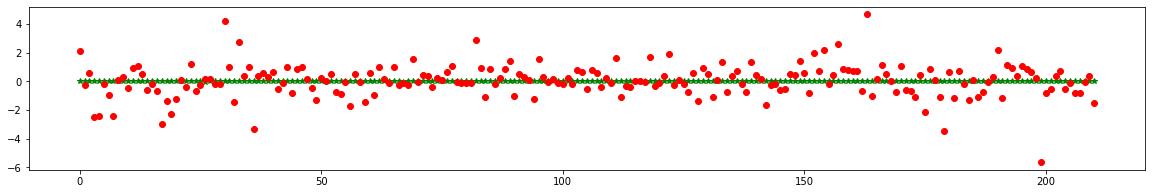

In [108]:
plt.plot(ypred,'g*', ytest.values.tolist(), 'ro')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [109]:
ypred

array([-0.01399609,  0.01304618,  0.02724823,  0.02229802, -0.01399609,
        0.01598601, -0.00452806,  0.02871814,  0.00357816, -0.00588989,
        0.00200014,  0.02229802,  0.02082811,  0.02724823,  0.02714014,
       -0.015466  ,  0.00178395,  0.02567023,  0.00020595,  0.01304618,
        0.02556214,  0.00200014,  0.02240612, -0.00295006,  0.02871814,
       -0.00431187, -0.01851392,  0.0160941 ,  0.02240612, -0.013888  ,
       -0.00768408, -0.00768408,  0.02093621,  0.02724823,  0.02871814,
       -0.00284196,  0.0193582 , -0.00273387,  0.00493997,  0.00189205,
       -0.01220191,  0.0193582 ,  0.01293808,  0.00031404, -0.0106239 ,
       -0.00295006, -0.00915399, -0.00915399,  0.02545404,  0.00200014,
        0.00662607,  0.00515616,  0.00042213,  0.01125199, -0.00757599,
        0.01136008,  0.00042213,  0.01598601,  0.02861005, -0.015466  ,
       -0.00757599,  0.00189205,  0.02409221,  0.01451609, -0.01693591,
       -0.00284196,  0.00673416, -0.01862201, -0.00431187,  0.02

In [126]:
print(xgbr.feature_importances_)

[0.02993149 0.03113225 0.05056157 0.04387962 0.06220257 0.03695931
 0.0484642  0.07441877 0.03977631 0.04523026 0.12461475 0.11894667
 0.05837291 0.07930654 0.04008776 0.04675452 0.06936052]


C:\Programs\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Programs\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[07:18:06] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


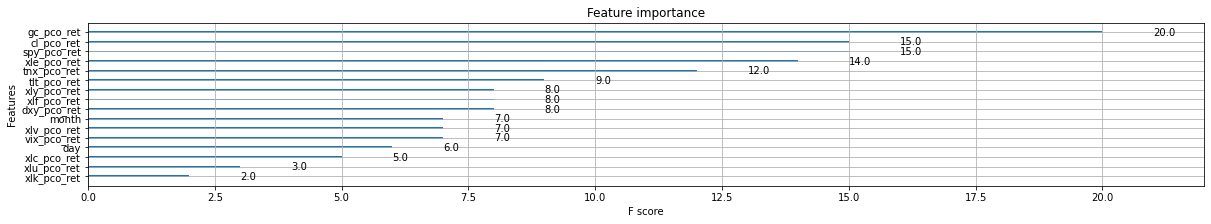

In [127]:
from xgboost import plot_importance
from matplotlib import pyplot
# load data

# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()

In [130]:
corr_matrix = X.corr()
#corr_matrix["adj_close"].sort_values(ascending=False)
corr_matrix

,spy_pco_ret,vix_pco_ret,tnx_pco_ret,dxy_pco_ret,cl_pco_ret,gc_pco_ret,tlt_pco_ret,xlf_pco_ret,xle_pco_ret,xlc_pco_ret,xlk_pco_ret,xlu_pco_ret,xlv_pco_ret,xly_pco_ret,day,month,year
spy_pco_ret,1.000000,-0.442644,0.533299,-0.032526,0.001811,-0.085853,-0.437562,0.913551,0.749708,0.914102,0.953992,0.877450,0.935077,0.953066,-0.044240,0.057399,-0.057984
vix_pco_ret,-0.442644,1.000000,-0.309679,-0.021548,0.026293,-0.059827,0.265549,-0.419961,-0.366195,-0.385719,-0.440192,-0.321514,-0.387505,-0.443529,0.097846,-0.048519,0.011724
tnx_pco_ret,0.533299,-0.309679,1.000000,0.116600,0.025085,-0.136118,-0.714867,0.651220,0.569372,0.430385,0.446951,0.511014,0.508082,0.490546,-0.051445,0.028778,0.083806
dxy_pco_ret,-0.032526,-0.021548,0.116600,1.000000,-0.058505,-0.128789,-0.047588,0.004267,0.006748,-0.035028,-0.024669,0.020745,-0.013657,-0.045141,-0.034936,0.021982,0.064393
cl_pco_ret,0.001811,0.026293,0.025085,-0.058505,1.000000,0.124681,-0.033342,-0.010725,0.044357,-0.008019,-0.019925,0.007757,-0.005068,-0.003873,-0.001676,-0.025082,-0.019240
gc_pco_ret,-0.085853,-0.059827,-0.136118,-0.128789,0.124681,1.000000,0.034842,-0.130247,0.001273,-0.098248,-0.082993,-0.093529,-0.099254,-0.079671,-0.036535,-0.016933,-0.018645
tlt_pco_ret,-0.437562,0.265549,-0.714867,-0.047588,-0.033342,0.034842,1.000000,-0.562675,-0.509612,-0.345168,-0.340530,-0.388604,-0.408725,-0.385385,0.056792,-0.035036,-0.125022
xlf_pco_ret,0.913551,-0.419961,0.651220,0.004267,-0.010725,-0.130247,-0.562675,1.000000,0.786144,0.785428,0.801913,0.873681,0.859377,0.854099,-0.057282,0.058038,-0.022698
xle_pco_ret,0.749708,-0.366195,0.569372,0.006748,0.044357,0.001273,-0.509612,0.786144,1.000000,0.617909,0.639996,0.701328,0.681298,0.679022,-0.107316,0.008867,-0.020483
xlc_pco_ret,0.914102,-0.385719,0.430385,-0.035028,-0.008019,-0.098248,-0.345168,0.785428,0.617909,1.000000,0.919581,0.764844,0.847636,0.870565,-0.027035,0.046535,-0.071649
